# FAIRe Qualitäts-KPIs
Autor: Martin Cao
Datum: 5.11.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Forschungsfragen: Wie optimiere ich ein beispielhaftes Fahrzeug mit objektiven Parametern?
Wie verwende ich KPIs, um Objekte zu optimieren?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Ein Auto konstruieren, welches den folgenden Anforderungen gerecht wird, um dann zu ermitteln, welche KPIs es hat.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


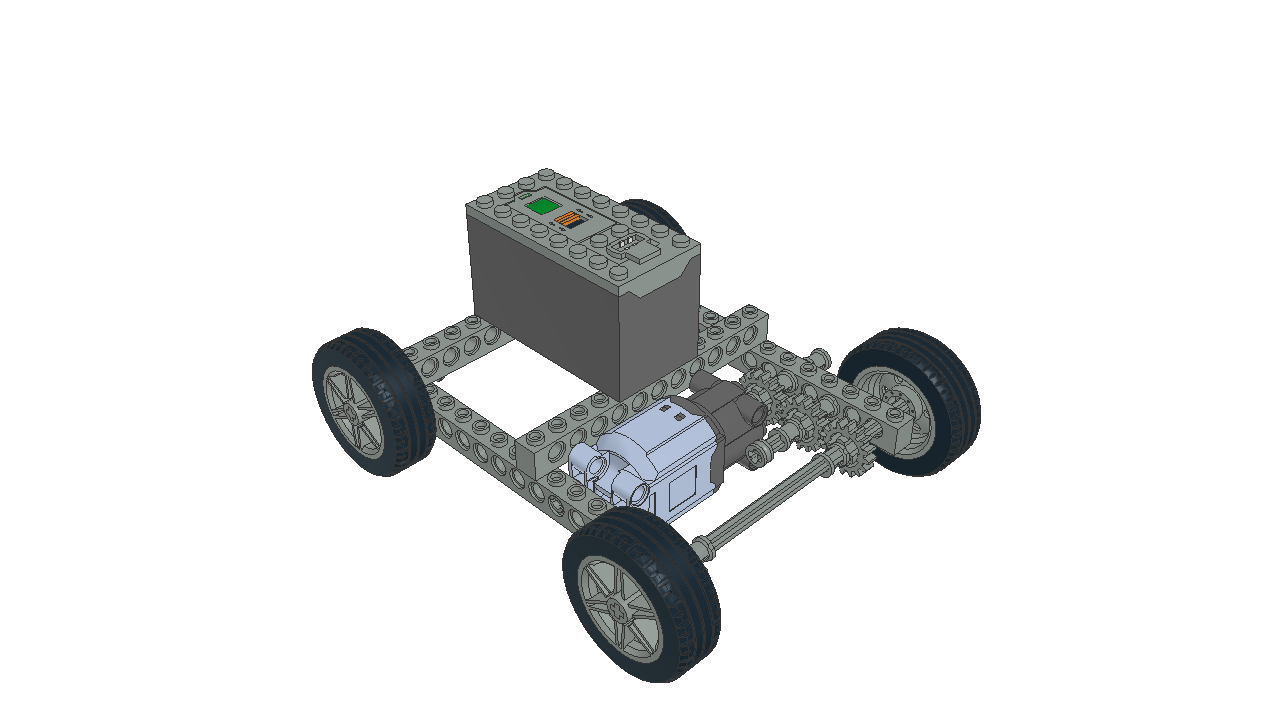

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

das Fahrzeug besitzt einen Motor und eine Batterie, welche direkt an dem Chassis befestigt werden. Das Getriebe ist auch direkt am Chassis verbaut. Das Chassis besteht aus 4 länglichen Bausteinen.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [10]:
import json
import pprint
from functions import calculation_rules
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

In [11]:
# initialize components

#Axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle_car1 = LegoComponent(axles["50451"])
front_axle_car1.properties["name"] = "front axle"
front_axle_car1.properties.update(axles["50451"])

back_axle_car1 = LegoComponent(axles["50451"])
back_axle_car1.properties["name"] = "back axle"
back_axle_car1.properties.update(axles["50451"])

motor_axle_car1 = LegoComponent(axles["32073"])
motor_axle_car1.properties["name"] = "motor axle"
motor_axle_car1.properties.update(axles["32073"])

gear_axle_car1 = LegoComponent(axles["32073"])
gear_axle_car1.properties["name"] = "gear axle"
gear_axle_car1.properties.update(axles["32073"])

#Wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_left_wheel_car1 = LegoComponent(wheels["56904c02"])
front_left_wheel_car1.properties.update(wheels["56904c02"])

front_right_wheel_car1 = LegoComponent(wheels["56904c02"])
front_right_wheel_car1.properties.update(wheels["56904c02"])

back_left_wheel_car1 = LegoComponent(wheels["56904c02"])
back_left_wheel_car1.properties.update(wheels["56904c02"])

back_right_wheel_car1 = LegoComponent(wheels["56904c02"])
back_right_wheel_car1.properties.update(wheels["56904c02"])   

#Frame
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
car_frame_left_car1 = LegoComponent(frames["3703"])
car_frame_left_car1.properties.update(frames["3703"])

car_frame_right_car1 = LegoComponent(frames["3703"])
car_frame_right_car1.properties.update(frames["3703"])

car_frame_middle_car1 = LegoComponent(frames["32018"])
car_frame_middle_car1.properties.update(frames["32018"])

car_frame_back_car1 = LegoComponent(frames["32018"])
car_frame_back_car1.properties.update(frames["32018"])

#Battery Box
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery_box_car1 = LegoComponent(batteries["88000-1"])
battery_box_car1.properties.update(batteries["88000-1"])
#Motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

motor_car1 = LegoComponent(motors["88003-1"])
motor_car1.properties["color"] = "blue"
motor_car1.properties.update(motors["88003-1"])

#Gears

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

gear1_car1 = LegoComponent(gears["94925"])
gear1_car1.properties["name"] = "gear 1"
gear1_car1.properties.update(gears["94925"])

gear2_car1 = LegoComponent(gears["94925"])
gear2_car1.properties["name"] = "gear 2"
gear2_car1.properties.update(gears["94925"])

gear3_car1 = LegoComponent(gears["94925"])
gear3_car1.properties["name"] = "gear 3"
gear3_car1.properties.update(gears["94925"])

#subassemblies

#Front Axle + Gear 3
front_wheel_assembly_car1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
)
front_wheel_assembly_car1.add([front_left_wheel_car1, front_right_wheel_car1, front_axle_car1, gear3_car1])

## Back Axle
back_wheel_assembly_car1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheel assembly",
)
back_wheel_assembly_car1.add([back_left_wheel_car1, back_right_wheel_car1, back_axle_car1])

# Motor_Car_1 + 'Gearbox'
motor_assembly_car1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor_car1 assembly",
)
motor_assembly_car1.add([motor_car1, motor_axle_car1, gear1_car1, gear_axle_car1, gear2_car1])

# Frame

frame_assembly_car1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "frame_car1 assembly",
)
frame_assembly_car1.add([car_frame_left_car1, car_frame_right_car1, car_frame_middle_car1, car_frame_back_car1])

# Main Assembly

car1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car1",
    manufacturer="martitsubishi cao",

)
# add frame and subassemblies
car1.add([battery_box_car1, front_wheel_assembly_car1, back_wheel_assembly_car1, motor_assembly_car1, frame_assembly_car1])

In [12]:
# set properties
pprint.pprint(motor_car1.properties)
pprint.pprint(front_axle_car1.properties)
pprint.pprint(back_axle_car1.properties)
pprint.pprint(motor_axle_car1.properties)
pprint.pprint(front_left_wheel_car1.properties)
pprint.pprint(back_left_wheel_car1.properties)
pprint.pprint(car_frame_car1.properties)
pprint.pprint(battery_box_car1.properties)
pprint.pprint(gear1_car1.properties)

{'category': 'motor',
 'color': 'blue',
 'compatible battery': '8881, 8878, 88000',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '13 x 11 x 2.5',
 'idle current [mA]': 120,
 'idle speed [rev per min]': 390,
 'input voltage [V]': 9,
 'item description': 'Power Functions L-Motor',
 'item number': '88003-1',
 'label': {'category': 'motor',
           'compatible battery': '8881, 8878, 88000',
           'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
           'delivery time [days]': 3,
           'dimensions [cm]': '13 x 11 x 2.5',
           'idle current [mA]': 120,
           'idle speed [rev per min]': 390,
           'input voltage [V]': 9,
           'item description': 'Power Functions L

NameError: name 'car_frame_car1' is not defined

In [13]:
# aggregate components
car1.get_component_list()
print_assembly_tree(car1)


LegoAssembly car1 [7356095c-d605-4fe0-b085-5d7b33dd5254]
├── LegoAssembly front wheel assembly [ff9dcb06-da65-40d7-9e76-8231858422e4]
│   ├── LegoComponent {'item number': '56904c02', 'item description': 'wheel 43,2', 'category': 'wheel', 'related items': 30699, 'price [Euro]': 0.11, 'mass [g]': 13.0, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C', 'diameter [mm]': 43.2} [6158e227-15a1-4a3a-bdfb-261a51b58a3c]
│   ├── LegoComponent {'item number': '56904c02', 'item description': 'wheel 43,2', 'category': 'wheel', 'related items': 30699, 'price [Euro]': 0.11, 'mass [g]': 13.0, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C', 'diameter [mm]': 43.2} [94639f2e-49e7-4179-aa30-c77782140e61]
│   ├── LegoComponent {'item number': 50451, 'item description': 'Axle 16 studs', 'category': 'axle', 'price [Euro]': 0.75, 'mass [g]': 2.37, 'delivery time [days]': 3, 'data s

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Summe der Massen: $$M = \sum_{i} m_{i}$$

Gesamtgewicht: $$P = \sum_{i} p_{i}$$

Lieferungszeit: $$T = max[DeliveryTime]$$

max. Drehmoment: $$T{q_{motor}}\prod_{i}i_{n}$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [14]:
# calculate the KPIs for your car
from functions import calculation_rules
import numpy as np

## Total Mass
total_mass_car1 = 0
mass_arr1 = np.array([])
for component in car1.get_component_list():
    mass_arr1 = np.append(mass_arr1, component.properties['label']['mass [g]'])
# use Calculation_rules function
total_mass_car1 = calculation_rules.kpi_totalmass(mass_arr1)
car1.properties["mass [g]"] = total_mass_car1

## Total Price
price_car1 = 0
price_arr1 = np.array([])
for component in car1.get_component_list():
    price_arr1 = np.append(price_arr1, component.properties['label']['price [Euro]'])
# use Calculation_rules function
price_car1 = round(calculation_rules.kpi_price(price_arr1), 2)
car1.properties["price [Euro]"] = price_car1

## Delivery Time
deliverytime_car1 = 0
delivery_arr = np.array([])
for component in car1.get_component_list():
    delivery_arr = np.append(delivery_arr, component.properties['label']['delivery time [days]'])
# Ise Calculation_rules function
deliverytime_car1 = calculation_rules.kpi_max(delivery_arr)
car1.properties["delivery time [days]"] = deliverytime_car1

## Locking Torque
torque_car1 = 0
max_torque_car1 = 0
teeth_arr = np.array([])
for component in car1.get_component_list():
    if component.properties['label']['category'] == 'motor':
        torque_car1 = component.properties['label']['locking torque [Ncm]']
# Check if gears were used
    elif component.properties['label']['category'] == 'gear':
        z = int(component.properties['label']['item description'].split(" ")[1])
        teeth_arr = np.append(teeth_arr, z)
if len(teeth_arr) == 0:
    max_torque_car1 = torque_car1
else: # Use Calculation_rule function to calculate transmission
    max_torque_car1 = calculation_rules.kpi_torque(torque_car1, teeth_arr)

In [15]:
# print your KPIs
print(f"Total Mass of the car: {total_mass_car1}g")
print(f"Total Price of the car: {price_car1}€")
print(f"Delivery Time of all parts: {deliverytime_car1} days")
print(f"Maximum Torque until Motor stops is: {max_torque_car1}Ncm")
kpis = {'Weight [g]': total_mass_car1,
        'Price [Euro]': price_car1, 
        'Deliverytime [days]': deliverytime_car1, 
        'Torque [Ncm]': max_torque_car1}

Total Mass of the car: 226.97999999999996g
Total Price of the car: 47.74€
Delivery Time of all parts: 12.0 days
Maximum Torque until Motor stops is: 18.0Ncm


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [16]:
# export car and its properties
with open("car1.json", "w") as fp:
    json.dump(car1.to_dict(), fp, cls=KPIEncoder)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Versuchsziel: KPIs des ersten Autos so weit, wie möglich reduzieren (Konzentration auf Kosten)

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

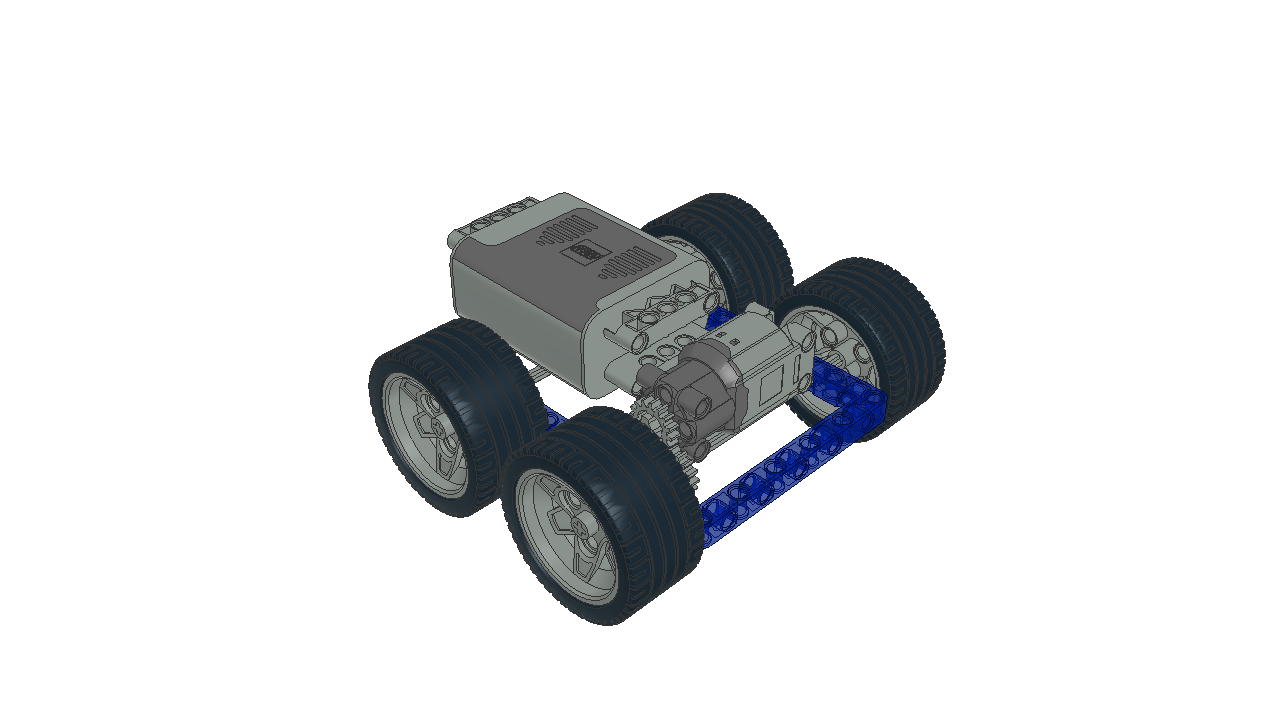

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

das Fahrzeug besteht aus einem rechteckigen Chassis, mit größeren Rädern und einer günstigeren Batterie. der gleiche Motor und die gleiche Gangübersetzung wurde verwendet.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [17]:
# initialize components

#Axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

front_axle_car2 = LegoComponent(axles["50451"])
front_axle_car2.properties["name"] = "front axle"
front_axle_car2.properties.update(axles["50451"])

back_axle_car2 = LegoComponent(axles["50451"])
back_axle_car2.properties["name"] = "back axle"
back_axle_car2.properties.update(axles["50451"])

motor_axle_car2 = LegoComponent(axles["32073"])
motor_axle_car2.properties["name"] = "motor axle"
motor_axle_car2.properties.update(axles["32073"])


#Wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_left_wheel_car2 = LegoComponent(wheels["41896c04"])
front_left_wheel_car2.properties.update(wheels["41896c04"])

front_right_wheel_car2 = LegoComponent(wheels["41896c04"])
front_right_wheel_car2.properties.update(wheels["41896c04"])

back_left_wheel_car2 = LegoComponent(wheels["41896c04"])
back_left_wheel_car2.properties.update(wheels["41896c04"])

back_right_wheel_car2 = LegoComponent(wheels["41896c04"])
back_right_wheel_car2.properties.update(wheels["41896c04"])   

#Frame
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
    
car_frame_car2 = LegoComponent(frames["39790"])
car_frame_car2.properties["color"] = "blue"
car_frame_car2.properties.update(frames["39790"])

#Battery Box
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery_box_car2 = LegoComponent(batteries["8881-1"])
battery_box_car2.properties.update(batteries["8881-1"])

#Motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

motor_car2 = LegoComponent(motors["88003-1"])
motor_car2.properties.update(motors["88003-1"])

#Gears

with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

gear1_car2 = LegoComponent(gears["94925"])
gear1_car2.properties["name"] = "gear 1"
gear1_car2.properties.update(gears["94925"])

gear2_car2 = LegoComponent(gears["94925"])
gear2_car2.properties["name"] = "gear 2"
gear2_car2.properties.update(gears["94925"])

#subassemblies

#Front Axle 
front_wheel_assembly_car2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
)
front_wheel_assembly_car2.add([front_left_wheel_car2, front_right_wheel_car2, front_axle_car2])

## Back Axle
back_wheel_assembly_car2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheel assembly",
)
back_wheel_assembly_car2.add([back_left_wheel_car2, back_right_wheel_car2, back_axle_car2])

# Motor_Car_2 + 'Gearbox'
motor_assembly_car2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor_car2 assembly",
)
motor_assembly_car2.add([motor_car2, motor_axle_car2, gear1_car2, gear2_car2])

# Frame

frame_assembly_car2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "frame_car2 assembly",
)
frame_assembly_car2.add([car_frame_car2])

# Main Assembly

car2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car2",
    manufacturer="maseratin cao",

)
# add frame and subassemblies
car2.add([battery_box_car2, front_wheel_assembly_car2, back_wheel_assembly_car2, motor_assembly_car2, frame_assembly_car2])

In [18]:
# set properties
pprint.pprint(motor_car2.properties)
pprint.pprint(front_axle_car2.properties)
pprint.pprint(back_axle_car2.properties)
pprint.pprint(motor_axle_car2.properties)
pprint.pprint(front_left_wheel_car2.properties)
pprint.pprint(back_left_wheel_car2.properties)
pprint.pprint(car_frame_car2.properties)
pprint.pprint(battery_box_car2.properties)
pprint.pprint(gear1_car2.properties)

{'category': 'motor',
 'compatible battery': '8881, 8878, 88000',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '13 x 11 x 2.5',
 'idle current [mA]': 120,
 'idle speed [rev per min]': 390,
 'input voltage [V]': 9,
 'item description': 'Power Functions L-Motor',
 'item number': '88003-1',
 'label': {'category': 'motor',
           'compatible battery': '8881, 8878, 88000',
           'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
           'delivery time [days]': 3,
           'dimensions [cm]': '13 x 11 x 2.5',
           'idle current [mA]': 120,
           'idle speed [rev per min]': 390,
           'input voltage [V]': 9,
           'item description': 'Power Functions L-Motor',
         

In [19]:
# aggregate components
car2.get_component_list()
print_assembly_tree(car2)

# export car and its properties
with open("car2.json", "w") as fp:
    json.dump(car1.to_dict(), fp, cls=KPIEncoder)

LegoAssembly car2 [0508386a-e285-4ef8-95a0-45f169b84bee]
├── LegoAssembly front wheel assembly [cb3b6553-9046-4318-9872-2fdf6cc52e0f]
│   ├── LegoComponent {'item number': '41896c04', 'item description': 'wheel 56', 'category': 'wheel', 'related items': 41897, 'price [Euro]': 0.45, 'mass [g]': 23.0, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=41896c04#T=C', 'diameter [mm]': 56.0} [5700106a-23c4-47f0-a71b-9c4a970805ca]
│   ├── LegoComponent {'item number': '41896c04', 'item description': 'wheel 56', 'category': 'wheel', 'related items': 41897, 'price [Euro]': 0.45, 'mass [g]': 23.0, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=41896c04#T=C', 'diameter [mm]': 56.0} [1c2892c9-5890-41c2-bfe0-ff1c4352859c]
│   └── LegoComponent {'item number': 50451, 'item description': 'Axle 16 studs', 'category': 'axle', 'price [Euro]': 0.75, 'mass [g]': 2.37, 'delivery time [days]': 3, 'data sourc

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [20]:
# calculate the KPIs for your car

from functions import calculation_rules
import numpy as np

## Total Mass
total_mass_car2 = 0
mass_arr2 = np.array([])
for component in car2.get_component_list():
    mass_arr2 = np.append(mass_arr2, component.properties['label']['mass [g]'])
# use Calculation_rules function
total_mass_car2 = round(calculation_rules.kpi_totalmass(mass_arr2), 2)
car2.properties["mass [g]"] = total_mass_car2

## Total Price
price_car2 = 0
price_arr2 = np.array([])
for component in car2.get_component_list():
    price_arr2 = np.append(price_arr2, component.properties['label']['price [Euro]'])
# use Calculation_rules function
price_car2 = round(calculation_rules.kpi_price(price_arr2), 2)
car2.properties["price [Euro]"] = price_car2

## Delivery Time
deliverytime_car2 = 0
delivery_arr2 = np.array([])
for component in car2.get_component_list():
    delivery_arr2 = np.append(delivery_arr2, component.properties['label']['delivery time [days]'])
# Ise Calculation_rules function
deliverytime_car2 = calculation_rules.kpi_max(delivery_arr2)
car1.properties["delivery time [days]"] = deliverytime_car2

## Locking Torque
torque_car2 = 0
max_torque_car2 = 0
teeth_arr2 = np.array([])
for component in car2.get_component_list():
    if component.properties['label']['category'] == 'motor':
        torque_car2 = component.properties['label']['locking torque [Ncm]']
# Check if gears were used
    elif component.properties['label']['category'] == 'gear':
        z2 = int(component.properties['label']['item description'].split(" ")[1])
        teeth_arr2 = np.append(teeth_arr2, z2)
if len(teeth_arr2) == 0:
    max_torque_car2 = torque_car2
else: # Use Calculation_rule function to calculate transmission
    max_torque_car2 = calculation_rules.kpi_torque(torque_car2, teeth_arr2)

In [21]:
# print your KPIs
print(f"Total Mass of the car: {total_mass_car2}g")
print(f"Total Price of the car: {price_car2}€")
print(f"Delivery Time of all parts: {deliverytime_car2} days")
print(f"Maximum Torque until Motor stops is: {max_torque_car2}Ncm")
kpis2 = {'Weight [g]': total_mass_car2,
        'Price [Euro]': price_car2, 
        'Deliverytime [days]': deliverytime_car2, 
        'Torque [Ncm]': max_torque_car2}

Total Mass of the car: 339.16g
Total Price of the car: 32.89€
Delivery Time of all parts: 12.0 days
Maximum Torque until Motor stops is: 18.0Ncm


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [22]:
# export car and its properties
with open("car2.json", "w") as fp:
    json.dump(car2.to_dict(), fp, cls=KPIEncoder)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

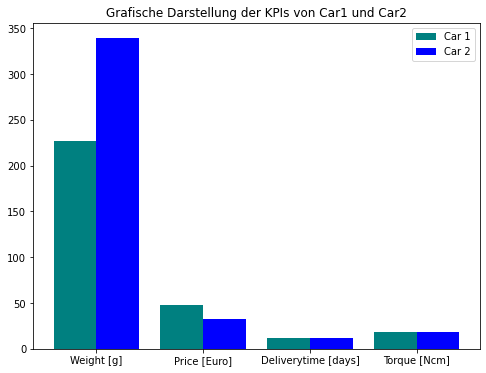

In [25]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt

categories = list(kpis.keys())

x = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x - 0.2, [kpis[k] for k in categories], width=0.4, color='teal', label='Car 1')
ax.bar(x + 0.2, [kpis2[k] for k in categories], width=0.4, color='blue', label='Car 2')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Beschriftung
ax.set_title('Grafische Darstellung der KPIs von Car1 und Car2')
ax.legend()
plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

das 2. Auto hat mehr Gewicht, ist allerdings günstiger, was das Hauptziel für mich war. Eine Verbesserung des Drehmomentes wäre durch eine niedrigere Gangübersetzung erzielt werden können, allerdings habe ich vergessen andere Zahnräder für das Getriebe zu verwenden. Die Lieferzeit konnte nicht reduziert werden, weil die Zahnräder deutlich am längsten zum liefern brauchen. Alle anderen Teile haben allerdings größtenteils eine deutlich geringere Lieferzeit.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Dadurch, dass die Berechnungsweise in den calculation_rules und die KPI-Werte in dem Dictionary einsehbar sind, und sämtliche Dateien über GitHub und JupyterHub serverbasiert gespeichert und einsehbar sind, sind die FAIR-Prinzipien ziemlich gut erfüllt.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Besserer Umgang mit Daten, und wie sie dabei helfen können, einem bei der Konstruktion mehr Effizienz zu verleihen.